In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [39]:
centroids = [(-5,-5) , (5,5) , (2,-3)]
cluster_std = [1,1,1]
X,Y = make_blobs(n_samples=100 , cluster_std=cluster_std , centers=centroids , n_features=2 , random_state=2)

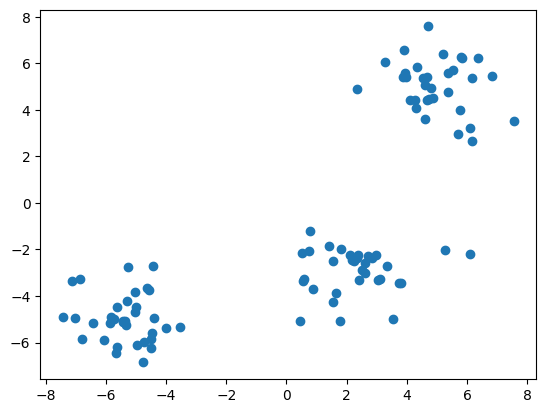

In [40]:
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [7]:
import random

In [29]:
class KMeans:
    def __init__(self , n_clusters=2 , max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self , X):
        random_index = random.sample(range(0,X.shape[0]) , self.n_clusters)
        # print(random_index)
        self.centroids = X[random_index]
        
        for i in range(self.max_iter):
            # Assign cluster

            cluster_group = self.assign_cluster(X)
            # print(cluster_group.shape)

            # Move centroids

            old_centroids = self.centroids
            self.centroids = self.move_centroids(X , cluster_group)

            
            # check finish
            if ( old_centroids == self.centroids ).all():
                break
        
        return cluster_group

    def assign_cluster(self , X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                dis = np.sqrt( np.dot((row-centroid) , (row-centroid)) )
                distances.append(dis)

            min_dis = min(distances)
            min_dis_index = distances.index(min_dis)

            cluster_group.append(min_dis_index)
            distances.clear()

        return np.array(cluster_group)
    

    def move_centroids(self , X , cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for typee in cluster_type:
            new_centroids.append(X[ cluster_group == typee ].mean(axis=0))

        return np.array(new_centroids)


In [41]:
km = KMeans(n_clusters=3 , max_iter=1000)
y_means = km.fit_predict(X)

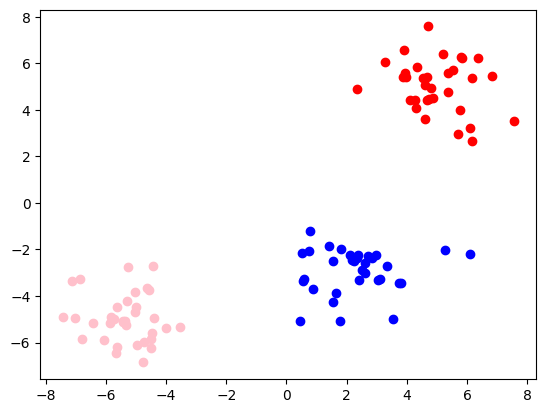

In [42]:
plt.scatter(X[y_means == 0,0] , X[y_means == 0,1] , color='blue')
plt.scatter(X[y_means == 1,0] , X[y_means == 1,1] , color='red')
plt.scatter(X[y_means == 2,0] , X[y_means == 2,1] , color='pink')